In [23]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

stocks = {
    'Ticker': ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'JPM', 'JNJ', 'WMT',
               'PG', 'DIS', 'NFLX'],
    'Company': ['Apple', 'Microsoft', 'Alphabet', 'Amazon', 'Meta', 'Tesla', 'NVIDIA', 
                'JPMorgan Chase', 'Johnson & Johnson', 'Walmart', 'Procter & Gamble',
                'Disney', 'Netflix']
}

df = pd.DataFrame(stocks)
df.to_csv('stock_list.csv', index=False)

end_date = datetime.now()
start_date = end_date - timedelta(days=365)
stock = yf.Ticker('NVDA')
hist = stock.history(start= start_date, end=end_date).reset_index()
        
# Получаем финансовые показатели
info = stock.info
metrics = {
    'PE': info.get('trailingPE', None),
    'PB': info.get('priceToBook', None),
    'EPS': info.get('trailingEps', None),
    'MarketCap': info.get('marketCap', None),
    'DividendYield': info.get('dividendYield', None)
}

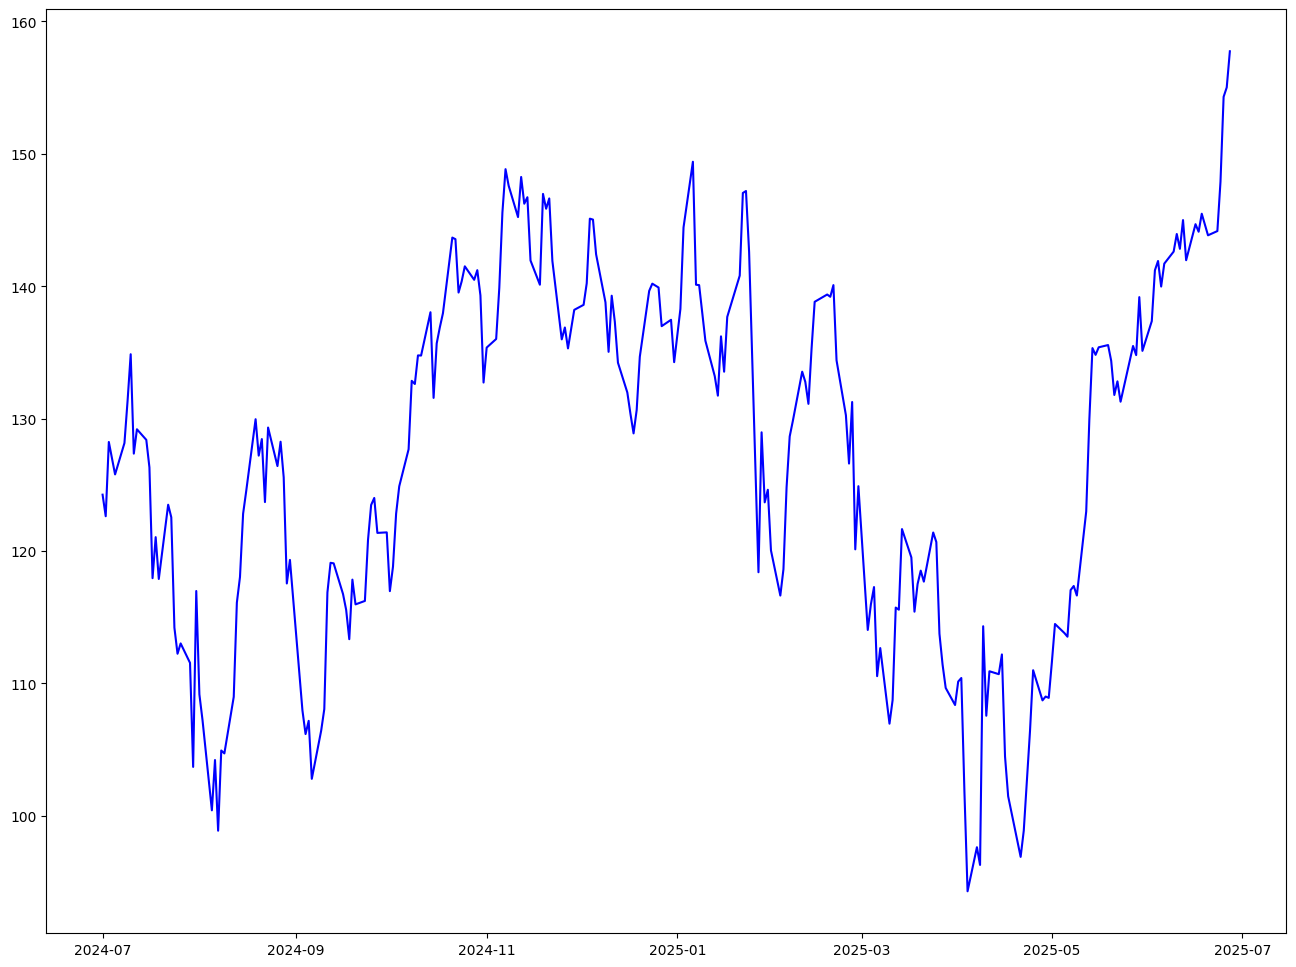

In [24]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(hist['Date'], hist['Close'], color='blue')

In [45]:
hist.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object


Средняя корреляция по всем акциям:
Price-Volume_Corr     -0.051955
Price-Intraday_Corr    0.008111
dtype: float64


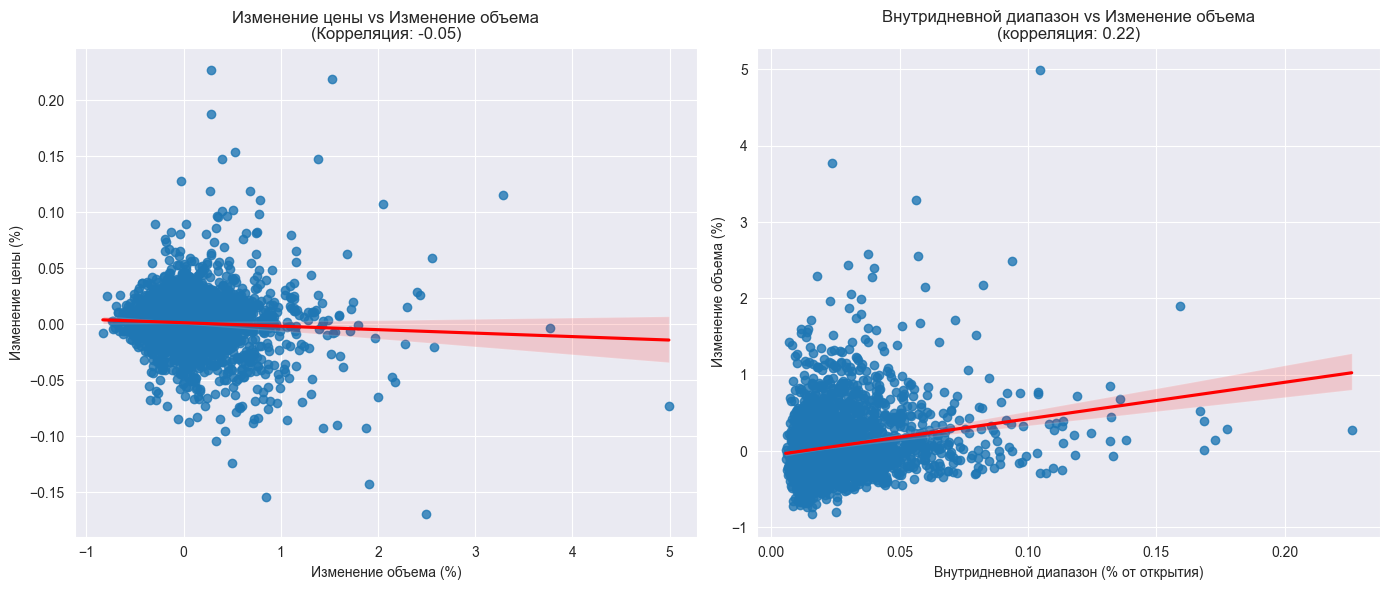

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

prices = pd.read_csv('Unload_Yahoo/stock_prices.csv', parse_dates=['Date'])
metrics = pd.read_csv('Unload_Yahoo/financial_metrics.csv')

# Расчет дневных изменений
prices['Price_Change'] = prices.groupby('Ticker')['Close'].pct_change()
prices['Volume_Change'] = prices.groupby('Ticker')['Volume'].pct_change()
prices['Intraday_Range'] = (prices['High'] - prices['Low']) / prices['Open']


# Корреляция между изменением цены и объемом
corr = prices.groupby(['Ticker', 'Company'])[['Price_Change', 'Volume_Change', 'Intraday_Range']].corr().unstack()
corr_df = corr.loc[:, ('Price_Change', ['Volume_Change', 'Intraday_Range'])]
corr_df.columns = ['Price-Volume_Corr', 'Price-Intraday_Corr']

print("\nСредняя корреляция по всем акциям:")
print(corr_df.mean())

corr_price_volume = prices['Price_Change'].corr(prices['Volume_Change'])
corr_intraday_volume = prices['Intraday_Range'].corr(prices['Volume_Change'])

plt.figure(figsize=(14, 6))
    
plt.subplot(1, 2, 1)
sns.regplot(data=prices, x='Volume_Change', y='Price_Change', line_kws={'color':'red'})
plt.title(f'Изменение цены vs Изменение объема\n(Корреляция: {corr_price_volume:.2f})')
plt.xlabel('Изменение объема (%)')
plt.ylabel('Изменение цены (%)')

plt.subplot(1, 2, 2)
sns.regplot(data=prices, x='Intraday_Range', y='Volume_Change', line_kws={'color':'red'})
plt.title(f'Внутридневной диапазон vs Изменение объема\n(корреляция: {corr_intraday_volume:.2f})')
plt.xlabel('Внутридневной диапазон (% от открытия)')
plt.ylabel('Изменение объема (%)')

plt.tight_layout()
plt.savefig('Unload_Yahoo/price_volume_analysis.png')
plt.show()



In [34]:
prices

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Company,Adj Close,Price_Change,Volume_Change,Intraday_Range
0,2024-07-01 00:00:00-04:00,211.102731,216.497500,210.933525,215.741043,60402900.0,0.0,0.0,AAPL,Apple,NaN,NaN,NaN,0.026357
1,2024-07-02 00:00:00-04:00,215.143827,219.354148,214.098727,219.244659,58046200.0,0.0,0.0,AAPL,Apple,NaN,0.016240,-0.039016,0.024427
2,2024-07-03 00:00:00-04:00,218.975919,220.518707,218.010433,220.518707,37369800.0,0.0,0.0,AAPL,Apple,NaN,0.005811,-0.356206,0.011455
3,2024-07-05 00:00:00-04:00,220.618222,225.395881,220.618222,225.286392,60412400.0,0.0,0.0,AAPL,Apple,NaN,0.021620,0.616610,0.021656
4,2024-07-08 00:00:00-04:00,226.032924,226.789396,222.210802,226.759537,59085900.0,0.0,0.0,AAPL,Apple,NaN,0.006539,-0.021957,0.020256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,2025-06-23 00:00:00-04:00,1238.030029,1254.839966,1215.010010,1253.540039,2667300.0,0.0,0.0,NFLX,Netflix,NaN,0.017971,-0.501271,0.032172
2984,2025-06-24 00:00:00-04:00,1260.550049,1282.569946,1255.000000,1279.109985,2663300.0,0.0,0.0,NFLX,Netflix,NaN,0.020398,-0.001500,0.021871
2985,2025-06-25 00:00:00-04:00,1286.839966,1298.000000,1273.810059,1275.250000,2146500.0,0.0,0.0,NFLX,Netflix,NaN,-0.003018,-0.194045,0.018798
2986,2025-06-26 00:00:00-04:00,1280.000000,1307.339966,1280.000000,1306.670044,2605900.0,0.0,0.0,NFLX,Netflix,NaN,0.024638,0.214023,0.021359
